In [14]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
#importing libarys
import selenium
import time
from selenium import webdriver 
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import requests
from time import sleep
import urllib.request
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
url = 'https://www.hubs.com/manufacture/?technology=3d-printing&reflang=fr&process=industrial-fdm'

In [ ]:
#Open web browser and navigate to url
browser = webdriver.Chrome()
response = browser.get(url)

#wait amount of time to load page 
browser.implicitly_wait(20)

sleep(2)
#accept the coockies
#COOKIES=browser.find_element('xpath','/html/body/h3d-root/h3d-feature-routing-outlet/h3d-router-outlet-template/h3d-cookie-consent-banner/div/button/span')
#COOKIES.click()

sleep(2)
#choose a random 3D Model 
pièce_dexemple = browser.find_element('xpath','/html/body/h3d-root/h3d-feature-routing-outlet/h3d-router-outlet-template/main/h3d-new-quote-request/div/div/section[2]/h3d-uploader-privacy/div/div[2]/button[2]')
pièce_dexemple.click()



In [ ]:
sleep(2)
#CLICK NEXTS BUTTONS TO PASS THE WELCOME 
NEXT = browser.find_element('xpath','//*[@id="mat-dialog-0"]/h3d-new-feature-walkthrough-dialog/div/div[3]/div[2]/button')
NEXT.click()
NEXT2 = browser.find_element('xpath','//*[@id="mat-dialog-0"]/h3d-new-feature-walkthrough-dialog/div/div[3]/div[2]/button[2]')
NEXT2.click()
NEXT3 = browser.find_element('xpath','//*[@id="mat-dialog-0"]/h3d-new-feature-walkthrough-dialog/div/div[3]/div[2]/button[2]')
NEXT3.click()

sleep(2)
FDM=browser.find_element('xpath','/html/body/h3d-root/h3d-feature-routing-outlet/h3d-router-outlet-template/main/h3d-order-page-v2/h3d-side-panel/mat-sidenav-container/mat-sidenav-content/div[2]/div/div/h3d-order-quote-details-v2/div/h3d-quote-details-v2/div/div[1]/div[2]/div/div/div/h3d-parts-actions-v2/div/button/span')
FDM.click()

sleep(2)
def FDMcheck():
    FDMcheck=browser.find_element('xpath','/html/body/h3d-root/h3d-feature-routing-outlet/h3d-router-outlet-template/main/h3d-order-page-v2/h3d-side-panel/mat-sidenav-container/mat-sidenav/div/h3d-technology-options-form/h3d-side-panel-content-wrapper/div[2]/div/div[1]')
    FDMcheck.click()

    sleep(2)
    FDMcheckclick=browser.find_element('xpath','//*[@id="mat-menu-panel-7"]/div/h3d-process-edit/div[2]/div[5]/div[2]')
    sleep(3)
    FDMcheckclick.click()

    sleep(2)
    Deletebutton =browser.find_element('xpath','/html/body/h3d-root/h3d-feature-routing-outlet/h3d-router-outlet-template/main/h3d-order-page-v2/h3d-side-panel/mat-sidenav-container/mat-sidenav/div/h3d-technology-options-form/h3d-side-panel-content-wrapper/div[1]/button')
    Deletebutton.click()
    
FDMcheck()

In [20]:
def extract_3DModel():
    model_info_list = [] 
    prices = browser.find_elements('class name','h3d-subtitle-2')
    dimensions = browser.find_elements_by_xpath('//*[@id="root"]/section/main/div[2]/div[1]/div[2]/div[2]/div/div[2]/div[1]/div/p[2]')
    material=find_elements_by_xpath('//*[@id="root"]/section/main/div[2]/div[1]/div[2]/div[2]/div/div[2]/div[1]/div/p[3]')
    model_names = browser.find_elements('class name','part-description__title')

    for i in range(len(model_names)):
        model_info = {}
        model_info["name"] = model_names[i].text
        if i < len(prices):
            model_info["price"] = prices[i].text
        else:
            model_info["price"] = None
        if i < len(dimensions):
            model_info["dimension"] = dimensions[i].text.replace('\n', '').replace('\u202f', '').strip()
        else:
            model_info["dimension"] = None
        model_info["specification"] = specifications[i].text.replace('\n', '')
        if i < len(errors):
            model_info["error"] = errors[i].text
            model_info["error"] = errors[i].text.replace('\n', '')
        else:
            model_info["error"] = None
        model_info_list.append(model_info)
    df = pd.DataFrame(model_info_list)
    df.loc[0:1, "error"] = "None"

    df['error'] = df['error'].str.replace('error_outline', '')
    df['error'] = df['error'].str.replace('\r\n', '')

    error1 = df[['error']][df['error'].notnull()]
    error1.drop(error1.index[:2], inplace=True)
    price1 = df[df['price'] == '—']
    error1 = error1.reset_index(drop=True)
    price1 = price1.reset_index(drop=True)
    price1['error'] = error1['error']
    df = df[df['price'] != '—']
    df['error'] = np.where(df['error'] != np.nan, np.nan, df['error'])
    df = pd.concat([df, price1], ignore_index=True)
    return df

In [ ]:
data = extract_3DModel()
data

In [ ]:
data.to_csv('350.csv', index=False)

In [ ]:
# this scrit use it one time to change the name of the models without special caracters
import os
import re

path = (r"C:\Users\CrawlAndTrainModel\Desktop\files")

files = [f for f in os.listdir(path)]

for i, file in enumerate(files):
    file_name, file_ext = os.path.splitext(file)
    new_file_name = re.sub(r'[^a-zA-Z0-9]+', '', file_name) + file_ext
    new_file_name = str(i + 1) + new_file_name
    old_file_path = os.path.join(path, file)
    new_file_path = os.path.join(path, new_file_name)
    os.rename(old_file_path, new_file_path)

In [ ]:
# this scrit use it one time to remove all models deffrent than .stl and .step
import os

folder_path = r'C:\Users\CrawlAndTrainModel\Desktop\files'  # replace with actual folder path

for filename in os.listdir(folder_path):
    if filename.lower().endswith('.step') or filename.lower().endswith('.stl'):
        continue  # skip files with desired extensions
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        os.remove(file_path)  # delete other files


In [ ]:
import os
import pyautogui

smallsize = []
hightsize = []
os.chdir(r"C:\Users\CrawlAndTrainModel\Desktop\files")

for f in os.listdir():
    if os.path.getsize(f) >= 1000000:
        hightsize.append(f)
    else:
        smallsize.append(f)
data = pd.DataFrame()

In [ ]:
from selenium.common.exceptions import TimeoutException
counter = 0
for file in smallsize :
    wait = WebDriverWait(browser, 30)
    Upload = wait.until(EC.element_to_be_clickable(('class name', 'order-part-uploader')))
    Upload.click()
    pyautogui.press('capslock')
    time.sleep(1)
    pyautogui.typewrite("c:")
    time.sleep(1)
    pyautogui.press('capslock')
    sleep(1)
    pyautogui.typewrite('\\Users\\CrawlAndTrainModel\\Desktop\\files')
    sleep(1)                    
    pyautogui.press('enter')
    sleep(1)             
    pyautogui.typewrite(file)
    sleep(1)
    pyautogui.press('enter') 
    print(file)
    counter+=1
    sleep(10)
    # Code to extract data and delete uploaded files
    if counter % 5 == 0:
        try:
            element = WebDriverWait(browser,30).until(EC.element_to_be_clickable(('class name', 'order-part-uploader')))
        except:
            pass
        sleep(3)
        extracted_data = extract_3DModel()
        sleep(5)
        pyautogui.scroll(10000000)
        sleep(3)
        checkbox = WebDriverWait(browser, 3).until(EC.element_to_be_clickable(('xpath','/html/body/h3d-root/h3d-feature-routing-outlet/h3d-router-outlet-template/main/h3d-order-page-v2/h3d-side-panel/mat-sidenav-container/mat-sidenav-content/div[2]/div/div/h3d-order-quote-details-v2/div/h3d-quote-details-v2/div/div[1]/div[2]/h3d-line-items-table/div/div[1]/div/div[1]/label/span')))
        checkbox.click()
        Delete = WebDriverWait(browser, 3).until(EC.element_to_be_clickable(('xpath','/html/body/h3d-root/h3d-feature-routing-outlet/h3d-router-outlet-template/main/h3d-order-page-v2/h3d-side-panel/mat-sidenav-container/mat-sidenav-content/div[2]/div/div/h3d-order-quote-details-v2/div/h3d-quote-details-v2/div/div[1]/div[2]/div/div/div/h3d-bulk-part-edit-actions-v2/div/button[1]')))
        Delete.click()
        Deletecheck = WebDriverWait(browser, 3).until(EC.element_to_be_clickable(('xpath', '//*[@id="part-edit-actions__confirm-delete-dialog__primary-action"]')))
        Deletecheck.click()
        sleep(3)
        browser.refresh()        
        sleep(3)
        FDMcheck()
        sleep(3)
        data = data.append(extracted_data, ignore_index=True)
        smallsize = smallsize[5:] # remove the first 2 files  the problem when the counter is == 2  he is not doing the if statment
        sleep(5)

In [ ]:
df_test.to_csv('out.csv', index=False)

In [ ]:
df = pd.read_csv('5658.csv')
df

In [108]:
# Read the CSV file into a dataframe
df_test = pd.read_csv('5658.csv')
# Extract the x, y, z, and volume values
extracted_values = df_test['dimension'].str.extract('(\d+.\d+) × (\d+.\d+) × (\d+.\d+) mm(.*[0-9.])', expand=True)
extracted_values.columns = ['x', 'y', 'z', 'Volume']

# Convert x, y, and z to float
extracted_values[['x', 'y', 'z']] = extracted_values[['x', 'y', 'z']].astype(float)

# Convert volume to float, removing the comma and any extra text
extracted_values['Volume'] = extracted_values['Volume'].str.replace(',', '').str.extract('(\d+.\d+)', expand=True).astype(float)

# Drop the original dimension column
df_test.drop(columns=['dimension'], inplace=True)

# Join the extracted values back to the original dataframe
df_test = df_test.join(extracted_values)

# remove the "$US" substring and convert the price
df_test['price'] = pd.to_numeric(df_test['price'].str.replace('[^0-9.-]', ''), errors='coerce')
df_test.dropna(subset=['price'], inplace=True)
df_test = df_test.reset_index(drop=True)
df_test['price'] = df_test['price'] - (df_test['price'] * 20/100)  # calculate final price
# Extract values from the specification column
df_test['technology'] = df_test['specification'].str.extract('(?i)(FDM|SLS|SLA)')
# extract color and create new column
df_test['infill'] = df_test['specification'].str.extract('(?i)Infill:\s*(\d+)%')
df_test['quality'] = df_test['specification'].str.extract('(?i)Layer height:\s*(\d+).*$')
# extract material
df_test['material'] = df_test['specification'].str.extract('Prototyping\s+(\w+)\s+\(FDM\)')
# Convert the 'infill' and 'layer height' columns to numeric values
df_test['infill'] = pd.to_numeric(df_test['infill'], errors='coerce')
df_test['quality'] = pd.to_numeric(df_test['quality'], errors='coerce')

#view the data
df_test

C:\Users\fzaea\AppData\Local\Temp\ipykernel_13504\488210704.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['price'] = pd.to_numeric(df_test['price'].str.replace('[^0-9.-]', ''), errors='coerce')


,name,price,specification,error,x,y,z,Volume,technology,infill,quality,material
0,10021901C920Mount2020profileclip.stl,5.816,3D printingPrototyping PLA (FDM)As printedColo...,NaN,62.0,30.0,28.0,11045.012,FDM,20.0,200,PLA
1,10031902Cabeca.stl,6.400,3D printingPrototyping PLA (FDM)As printedColo...,NaN,18.9,23.6,23.8,4214.114,FDM,20.0,200,PLA
2,10041903cableChainlinkCoverv2.stl,5.816,3D printingPrototyping PLA (FDM)As printedColo...,NaN,24.0,5.8,7.0,242.879,FDM,20.0,200,PLA
3,10051904CableManage.STL,8.656,3D printingPrototyping PLA (FDM)As printedColo...,NaN,83.0,17.0,25.9,12577.295,FDM,20.0,200,PLA
4,10061905CableTiev2.stl,5.816,3D printingPrototyping PLA (FDM)As printedColo...,NaN,20.0,20.0,5.0,750.221,FDM,20.0,200,PLA
...,...,...,...,...,...,...,...,...,...,...,...,...
4874,9151823BufferPicatinnyv4.stl,12.224,3D printingPrototyping PLA (FDM)As printedColo...,NaN,35.5,53.1,144.7,77475.278,FDM,20.0,200,PLA
4875,9161824BuffyMrPointyBookmarkindentedB.stl,5.816,3D printingPrototyping PLA (FDM)As printedColo...,NaN,50.0,133.1,2.0,6516.807,FDM,20.0,200,PLA
4876,8491764brokenbrainf3.stl,31.080,3D printingPrototyping PLA (FDM)As printedColo...,NaN,115.4,82.4,86.3,357907.390,FDM,20.0,200,PLA
4877,8551770BronzeDragonWyrmlingUpdatedpresupported...,30.848,3D printingPrototyping PLA (FDM)As printedColo...,NaN,76.3,52.4,49.7,9525.599,FDM,20.0,200,PLA


In [109]:
print(df_test[['x', 'y', 'z', 'Volume']].isnull().sum())

x         0
y         0
z         0
Volume    1
dtype: int64


In [110]:
print(df_test[['price']].isnull().sum())

price    0
dtype: int64


In [111]:
df_test = df_test.dropna(subset=['Volume'])

In [112]:
df_test

,name,price,specification,error,x,y,z,Volume,technology,infill,quality,material
0,10021901C920Mount2020profileclip.stl,5.816,3D printingPrototyping PLA (FDM)As printedColo...,NaN,62.0,30.0,28.0,11045.012,FDM,20.0,200,PLA
1,10031902Cabeca.stl,6.400,3D printingPrototyping PLA (FDM)As printedColo...,NaN,18.9,23.6,23.8,4214.114,FDM,20.0,200,PLA
2,10041903cableChainlinkCoverv2.stl,5.816,3D printingPrototyping PLA (FDM)As printedColo...,NaN,24.0,5.8,7.0,242.879,FDM,20.0,200,PLA
3,10051904CableManage.STL,8.656,3D printingPrototyping PLA (FDM)As printedColo...,NaN,83.0,17.0,25.9,12577.295,FDM,20.0,200,PLA
4,10061905CableTiev2.stl,5.816,3D printingPrototyping PLA (FDM)As printedColo...,NaN,20.0,20.0,5.0,750.221,FDM,20.0,200,PLA
...,...,...,...,...,...,...,...,...,...,...,...,...
4874,9151823BufferPicatinnyv4.stl,12.224,3D printingPrototyping PLA (FDM)As printedColo...,NaN,35.5,53.1,144.7,77475.278,FDM,20.0,200,PLA
4875,9161824BuffyMrPointyBookmarkindentedB.stl,5.816,3D printingPrototyping PLA (FDM)As printedColo...,NaN,50.0,133.1,2.0,6516.807,FDM,20.0,200,PLA
4876,8491764brokenbrainf3.stl,31.080,3D printingPrototyping PLA (FDM)As printedColo...,NaN,115.4,82.4,86.3,357907.390,FDM,20.0,200,PLA
4877,8551770BronzeDragonWyrmlingUpdatedpresupported...,30.848,3D printingPrototyping PLA (FDM)As printedColo...,NaN,76.3,52.4,49.7,9525.599,FDM,20.0,200,PLA


In [113]:
print(df_test[['x', 'y', 'z', 'Volume','price']].isnull().sum())

x         0
y         0
z         0
Volume    0
price     0
dtype: int64


In [114]:
# count the frequency of each value in the 'price' column
freq = df_test['Volume'].value_counts()

print(freq)

5633.759      2
29674.933     2
34057.840     2
2316.255      2
1884.942      2
             ..
64.095        1
6806.980      1
540239.717    1
530530.383    1
9033.159      1
Name: Volume, Length: 4860, dtype: int64


In [115]:
# count the frequency of each value in the 'price' column
freq = df_test['x'].value_counts()

print(freq)

60.0     90
80.0     74
30.0     67
20.0     64
40.0     63
         ..
86.5      1
76.5      1
105.5     1
24.9      1
261.9     1
Name: x, Length: 1358, dtype: int64


In [116]:
# count the frequency of each value in the 'price' column
freq = df_test['y'].value_counts()

print(freq)

30.0     72
20.0     66
80.0     63
40.0     57
35.0     53
         ..
174.9     1
114.1     1
58.9      1
249.8     1
133.1     1
Name: y, Length: 1271, dtype: int64


In [117]:
# count the frequency of each value in the 'price' column
freq = df_test['z'].value_counts()

print(freq)

10.0     133
20.0     117
30.0      95
2.0       90
5.0       89
        ... 
248.6      1
90.3       1
57.6       1
153.3      1
86.3       1
Name: z, Length: 1051, dtype: int64


In [118]:
freq = df_test['price'].value_counts()
print(freq)

5.816     1669
5.872       12
5.824       12
5.960       12
6.072       11
          ... 
13.792       1
14.016       1
9.136        1
80.240       1
45.168       1
Name: price, Length: 1551, dtype: int64


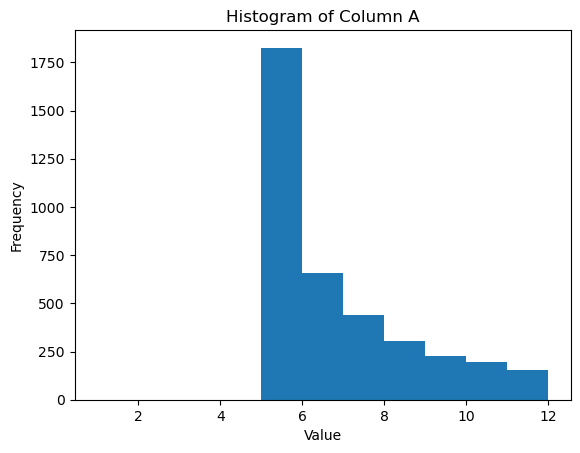

In [119]:
import matplotlib.pyplot as plt

# create a histogram of column A with 3 bins for the 3 different scales
plt.hist(df_test['price'], bins=[1,2,3,4,5,6,7,8,9,10,11,12])

# add a title and labels to the plot
plt.title('Histogram of Column A')
plt.xlabel('Value')
plt.ylabel('Frequency')

# display the plot
plt.show()


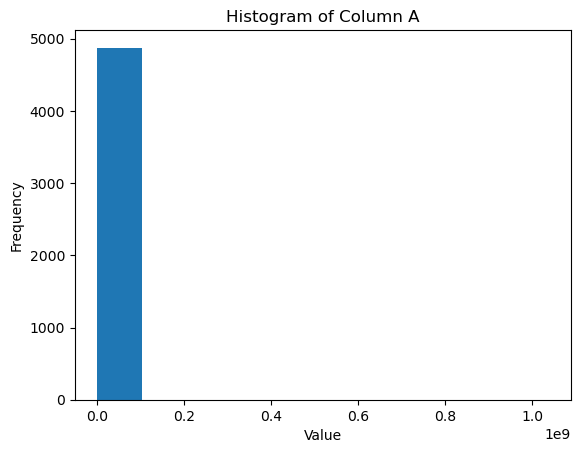

In [120]:
import matplotlib.pyplot as plt
# create a histogram of column A
plt.hist(df_test['Volume'])

# add a title and labels to the plot
plt.title('Histogram of Column A')
plt.xlabel('Value')
plt.ylabel('Frequency')

# display the plot
plt.show()

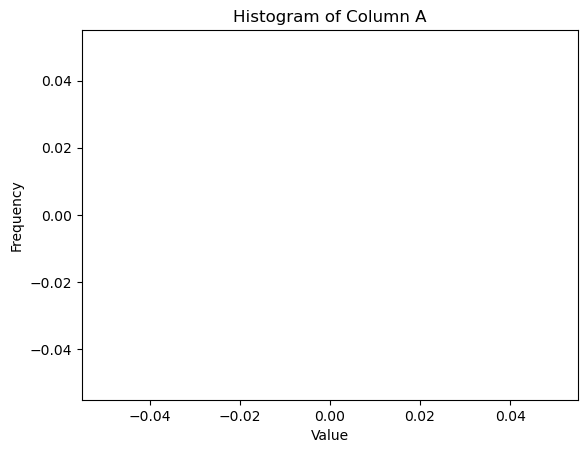

In [121]:
import matplotlib.pyplot as plt

# create a histogram of column A with 3 bins for the 3 different scales
plt.hist(df_test['x'], bins=[12])

# add a title and labels to the plot
plt.title('Histogram of Column A')
plt.xlabel('Value')
plt.ylabel('Frequency')

# display the plot
plt.show()


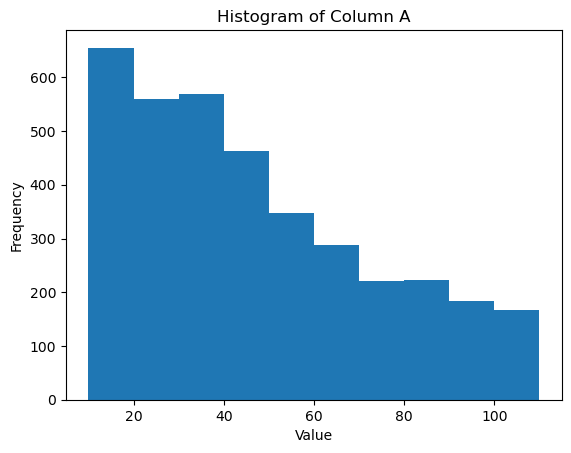

In [122]:
import matplotlib.pyplot as plt

# create a histogram of column A with 3 bins for the 3 different scales
plt.hist(df_test['y'], bins=[10, 20, 30,40,50,60,70,80,90,100,110])

# add a title and labels to the plot
plt.title('Histogram of Column A')
plt.xlabel('Value')
plt.ylabel('Frequency')

# display the plot
plt.show()


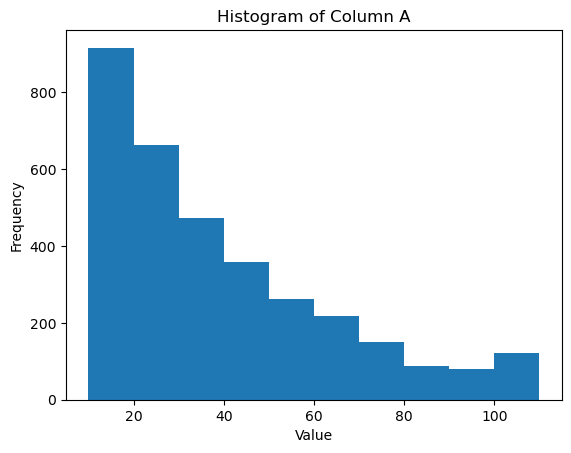

In [123]:
import matplotlib.pyplot as plt

# create a histogram of column A with 3 bins for the 3 different scales
plt.hist(df_test['z'], bins=[10, 20, 30,40,50,60,70,80,90,100,110])

# add a title and labels to the plot
plt.title('Histogram of Column A')
plt.xlabel('Value')
plt.ylabel('Frequency')

# display the plot
plt.show()


In [124]:
# View dataframe summary
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4878
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4878 non-null   object 
 1   price          4878 non-null   float64
 2   specification  4878 non-null   object 
 3   error          0 non-null      object 
 4   x              4878 non-null   float64
 5   y              4878 non-null   float64
 6   z              4878 non-null   float64
 7   Volume         4878 non-null   float64
 8   technology     4878 non-null   object 
 9   infill         4877 non-null   float64
 10  quality        4878 non-null   int64  
 11  material       4877 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 495.4+ KB


In [125]:
# Extracting the model input and output features
X = df_test.drop(["price","name","error","specification","technology","infill","quality","material"], axis=1)  # Removing species columns from the input features
y = df_test["price"]  # Single output feature containing different classes of species

In [126]:
from sklearn.utils import shuffle
# Shuffle the data
X, y = shuffle(X, y, random_state=42)

In [127]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [128]:
# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
# Fit the linear regression model to the training data
reg = LinearRegression()
reg.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = reg.predict(X_test)

# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Linear Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")
print("Learned coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)
predicted_price = reg.predict([[92.5,66.1,31.9,9033.159]])
print("Predicted price:", predicted_price)
# Use cross-validation to evaluate the model
scores = cross_val_score(reg, X_test, y_test, cv=3)
# Print the scores
print(scores)


# Fit the Ridge regression model to the training data
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")
print("\nRidge Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")
print("Learned coefficients: ", ridge.coef_)
print("Intercept: ", ridge.intercept_)
predicted_price = ridge.predict([[92.5,66.1,31.9,9033.159]])
print("Predicted price:", predicted_price)
# Use cross-validation to evaluate the model
scores = cross_val_score(ridge, X_test, y_test, cv=3)
# Print the scores
print(scores)



# Fit the Lasso regression model to the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nLasso Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")
print("Learned coefficients: ", lasso.coef_)
print("Intercept: ", lasso.intercept_)
predicted_price = lasso.predict([[92.5,66.1,31.9,9033.159]])
print("Predicted price:", predicted_price)
# Use cross-validation to evaluate the model
scores = cross_val_score(lasso, X_test, y_test, cv=5)
# Print the scores
print(scores)



# Fit the decision tree regression model to the training data
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = tree.predict(X_test)

# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nDecision Tree Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")
try:
      print("Learned coefficients: ", tree.feature_importances_)
except AttributeError:
      print("Decision Tree regressor does not have 'coef_' attribute")
# Calculate the mean of the target variable in the training data
y_train_mean = np.mean(y_train)

# Calculate the intercept value
intercept = y_train_mean - np.dot(tree.feature_importances_, np.mean(X_train, axis=0))

print("Intercept value:", intercept)
predicted_price = tree.predict([[92.5,66.1,31.9,9033.159]])
print("Predicted price:",predicted_price)
# Use cross-validation to evaluate the model
scores = cross_val_score(tree, X_test, y_test, cv=3)
# Print the scores
print(scores)


# Fit the random forest regression model to the training data
forest =RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = forest.predict(X_test)

# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nRandom Forest Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")
print("Feature importances: ", forest.feature_importances_)
# Calculate the mean of the target variable in the training data
y_train_mean = np.mean(y_train)

# Calculate the intercept value
intercept = y_train_mean - np.dot(forest.feature_importances_, np.mean(X_train, axis=0))

print("Intercept value:", intercept)
predicted_price = forest.predict([[92.5,66.1,31.9,9033.159]])
print("Predicted price:", predicted_price)
# Use cross-validation to evaluate the model
scores = cross_val_score(forest, X_test, y_test, cv=3)
# Print the scores
print(scores)


# Fit the support vector regression model to the training data
svr = SVR(kernel='rbf', C=100, epsilon=0.2)
svr.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = svr.predict(X_test)

# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nSupport Vector Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")
try:
    print("Learned coefficients: ", svr.feature_importances_)
except AttributeError:
    print("svr does not have 'coef_' attribute")
print("Intercept: ", svr.intercept_)

# Use the model to make a prediction on new data
predicted_price = svr.predict([[92.5,66.1,31.9,9033.159]])
print("Predicted price:", predicted_price)

# Use cross-validation to evaluate the model
scores = cross_val_score(svr, X_test, y_test, cv=3)
# Print the scores
print("Cross-validation scores:", scores)

Linear Regression:
MSE: 782.2472741230125
RMSE: 27.968683811059336
R^2 score: 0.12374479475174782
Learned coefficients:  [ 4.73570142e-02 -8.83701456e-04  1.60382263e-01 -2.29778421e-07]
Intercept:  2.0946741919977523
Predicted price: [11.53090391]
[0.5907569  0.16845039 0.05903105]
R^2 score: 0.12374479784696091

Ridge Regression:
MSE: 782.2472713598655
RMSE: 27.968683761662177
R^2 score: 0.12374479784696091
Learned coefficients:  [ 4.73570119e-02 -8.83695471e-04  1.60382247e-01 -2.29778416e-07]
Intercept:  2.0946746955884947
Predicted price: [11.53090408]
[0.59075694 0.16845038 0.05903105]

Lasso Regression:
MSE: 782.2276346342693
RMSE: 27.968332711019247
R^2 score: 0.12376679445032002
Learned coefficients:  [ 4.73099370e-02 -8.30195611e-04  1.60346407e-01 -2.29773284e-07]
Intercept:  2.096349381085945
Predicted price: [11.53061743]
[0.5867028  0.37350813 0.44485392 0.110894   0.02490036]

Decision Tree Regression:
MSE: 1008.498471920497
RMSE: 31.75686495736783
R^2 score: -0.12969653

C:\Users\fzaea\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\fzaea\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\fzaea\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\fzaea\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(



Random Forest Regression:
MSE: 672.7382084051295
RMSE: 25.937197389176987
R^2 score: 0.2464143035266395
Feature importances:  [0.1675147  0.12515231 0.26133903 0.44599396]
Intercept value: -219426.0200600986
Predicted price: [29.91208]


C:\Users\fzaea\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-0.2975285   0.1690798   0.09045898]

Support Vector Regression:
MSE: 755.2322766313723
RMSE: 27.481489709100057
R^2 score: 0.15400636670590684
svr does not have 'coef_' attribute
Intercept:  [-11.5953305]
Predicted price: [6.49833578]


C:\Users\fzaea\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Cross-validation scores: [0.27217039 0.14561174 0.07476723]
